# Lecture_10_08_18
Statistical Thinking in Python I

In [6]:
import pandas as pd
df = pd.read_csv('/Users/kevin/Dropbox/Github/Classes/IS_485_685/sliced_training.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()
#type(df['Account Balance'][0])

,Index,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,845,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,659,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,194,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
3,213,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
4,625,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2


### Bee Swarm Plot using Seaborn
Advantages relative to histogram: You don't lose any data by automatically putting it into a bin.<p>
Disadvantages: Can become crowded if there are too many categories on the x-axis.

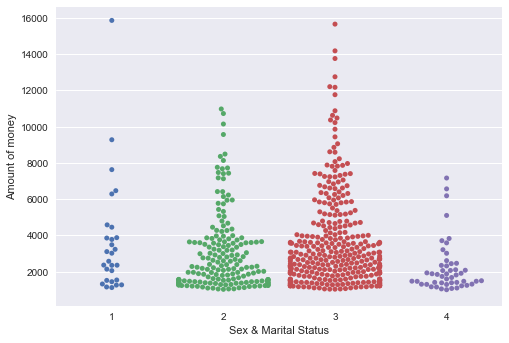

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Sex & Marital Status',y=' Amount', data=df)

# Label the axes
_ = plt.xlabel('Sex & Marital Status')
_ = plt.ylabel('Amount of money')
# Show the plot
plt.show()

### ECDF plot (empirical cumulative distribution function)

In [10]:
import numpy as np

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

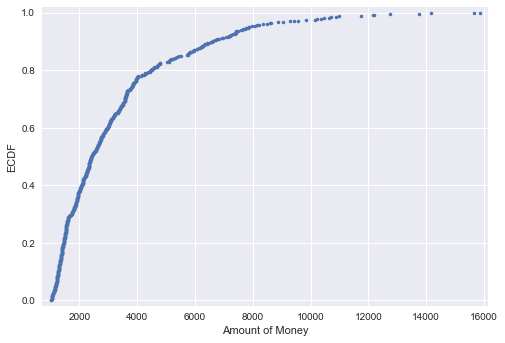

In [11]:
# Compute ECDF for Dollar Amounts of Loans
x, y = ecdf(df[' Amount'])

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Amount of Money')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

#### Example: Looking above we could say that about 80% of all loans that were given were 4,000 dollars or less. <p>
We could also say that 99 percent of all loans given were $10,000 dollars or less.

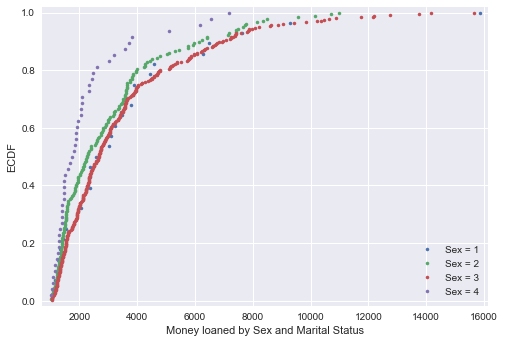

In [15]:
# Compute ECDFs
Amount_by_sex1 = df.loc[df['Sex & Marital Status'] == 1, ' Amount']
Amount_by_sex2 = df.loc[df['Sex & Marital Status'] == 2, ' Amount']
Amount_by_sex3 = df.loc[df['Sex & Marital Status'] == 3, ' Amount']
Amount_by_sex4 = df.loc[df['Sex & Marital Status'] == 4, ' Amount']

x_1 ,y_1 = ecdf(Amount_by_sex1)
x_2, y_2 = ecdf(Amount_by_sex2)
x_3, y_3 = ecdf(Amount_by_sex3)
x_4, y_4 = ecdf(Amount_by_sex4)


# Plot all ECDFs on the same plot
_ = plt.plot(x_1, y_1, marker='.',linestyle='none')
_ = plt.plot(x_2, y_2, marker='.',linestyle='none')
_ = plt.plot(x_3, y_3, marker='.',linestyle='none')
_ = plt.plot(x_4, y_4, marker='.',linestyle='none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('Sex = 1', 'Sex = 2', 'Sex = 3', 'Sex = 4'), loc='lower right')
_ = plt.xlabel('Money loaned by Sex and Marital Status')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

#### Example: Look right at 2,000 dollars on the x-axis. Notice if we go up to the sex = 4 line we can say that about 70% of all loans given out to this sex & marital category was less than 2,000 dollars. Now look at the red sex = 3 line. We can say that about 35% of all loans given out to this sex & marital category was less than 2,000 dollars.
This would lead us to believe, and almost certainly be true with a hypothesis test, that lenders are far more likely to give bigger valued loans to the sex = 3 category than the sex = 4 category.

### Means, Medians, and Percentiles
Note: Still using the Amount column from the above data set

In [18]:
mean_loan = np.mean(df[' Amount'])
median_loan = np.median(df[' Amount'])
print('Mean Loan Amount: {}'.format(mean_loan))
print('Median Loan Amount: {}'.format(median_loan))

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_amount = np.percentile(df[' Amount'], percentiles)
print('Percentile Loan Amounts: {}'.format(ptiles_amount))

Mean Loan Amount: 3255.988580750408
Median Loan Amount: 2424.0
Percentile Loan Amounts: [ 1104.2  1546.   2424.   3863.  10057.9]


### Note: If the mean > median, then the data is right-skewed. If the mean < median then the data is left-skewed.

### Plot Histogram to prove right-skew. (Remember right-skew means tail is on the right).

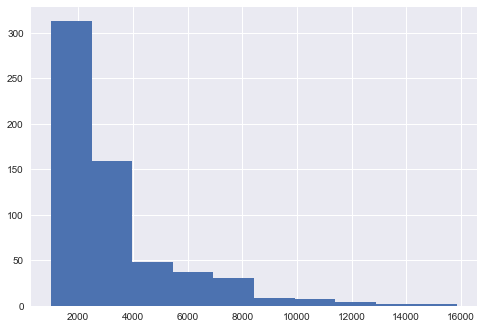

In [20]:
plt.hist(df[' Amount'])
plt.show()

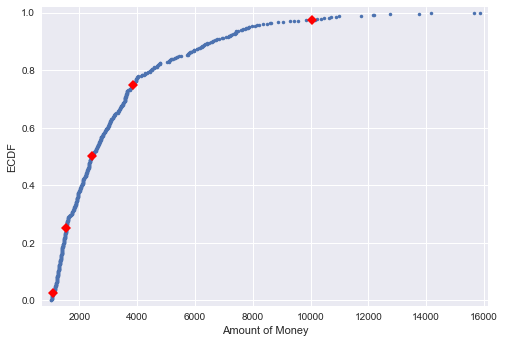

In [19]:
# Same x, y from above.
x, y = ecdf(df[' Amount'])

# Plot the ECDF
_ = plt.plot(x, y, '.')
plt.margins(0.02)
_ = plt.xlabel('Amount of Money')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_amount, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

### Box and Whisker Plot

/Users/kevin/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


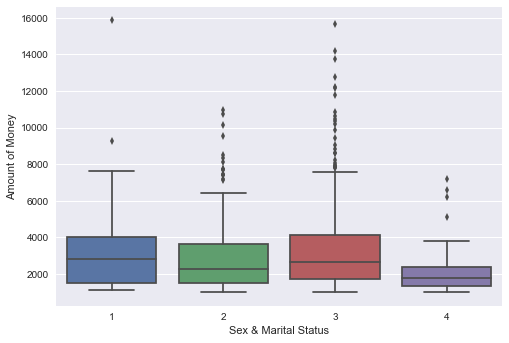

In [21]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='Sex & Marital Status', y=' Amount',data=df)

# Label the axes
_ = plt.xlabel('Sex & Marital Status')
_ = plt.ylabel('Amount of Money')

# Show the plot
plt.show()

### Variance & Standard Deviation (spread of a distribution).

$\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}$

This is the variance formula. The standard deviation is just the square root of the above formula.

In [22]:
variance_amount = np.var(df[' Amount'])
variance_amount

5661743.130375309

In [26]:
std_amount = np.std(df[' Amount'])
std_amount

2379.4417686456018

### Note: The reason we use Standard Deviation more often is because it is in the same units as the original column. The variance is always in squared units of the original column.
Here, the standard deviation is in dollars, whereas the variance is in dollars squared. Dollars squared isn't very intuitive, which is why we like the same original units of just dollars.

## Scatter Plots & Covariance/Correlation
Scatter Plots can give a visual description of potential correlations amount two columns. Formula covariance & correlation statistics can give insight as to how big of a correlation there might be.

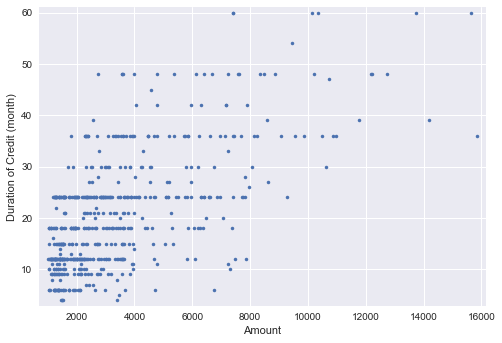

In [7]:
# Make a scatter plot
_ = plt.plot(df[' Amount'], df['Duration of Credit (month)'], marker='.',linestyle='none')


# Set margins
plt.margins(.02)
# Label the axes
_ = plt.xlabel('Amount')
_ = plt.ylabel('Duration of Credit (month)')

# Show the result
plt.show()

### Covariance

$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

In [38]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(df['Duration of Credit (month)'], df[' Amount'])

# Print covariance matrix
print('Covariance Matrix: \n {} \n'.format(covariance_matrix))

# Extract covariance of length and width of petals: petal_cov
Amount_cov = covariance_matrix[0,1]

# Print the length/width covariance
print('Covariance: {}'.format(Amount_cov))

Covariance Matrix: 
 [[1.23390152e+02 1.69019221e+04]
 [1.69019221e+04 5.67099434e+06]] 

Covariance: 16901.922144387932


### Pearson Correlation

$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$

Note: Pearson correlation is most common. Why use correlation? Similar idea to variance and standard deviation. Covariance isn't very intuitive to read. For example I have no idea what a covariance of 16901 from above means. It could be a lot or a little, no idea. Correlation is nice because the values are always between -1 and 1. -1 means perfectly inversely correlated and 1 means perfectly correlated. This is a metric us humans can understand intuitively.

In [39]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(df['Duration of Credit (month)'], df[' Amount'])

# Print the result
print('Pearson Correlation: {}'.format(r))

Pearson Correlation: 0.638949065848388


## Hacker Statistics & Simulations

### Bernoulli Trial
Bernoulli is test which is true or false, yes or no, 1 or 0.<p>

$\begin{equation}
    f(k;p) =
    \left\{
        \begin{array}{cc}
                p & \mathrm{if\ } k=1 \\
                1-p & \mathrm{if\ } k=0 \\
        \end{array} 
    \right.
\end{equation}$

In [50]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+=1

    return n_success

print(perform_bernoulli_trials(100, .5))

51


### Binomial Trials
A Binomial test is a set of "n" bernoulli trials. For example, finding the probability that a 5 coin flips and all 5 end up all heads.

Binomial Distribution = $\binom{n}{k}p^{n}(1-p)^{n-k}$

Where $\frac{n!}{k!(n-k)!} = \binom{n}{k}$

#### Example Results: We would plug in 5 for n, 5 for k, and .5 for p. $\binom{5}{5}.5^{5}(1-.5)^{5-5} = 1/32 = .03125 = 3.125  percent $

In [52]:
from scipy.stats import binom

# Calculate Binomial Example from above using Python
binom.pmf(k = 5, n = 5, p = .5)

0.03125

### Poisson Distribution

$P\left( k \right) = \frac{{e^{ - \lambda } \lambda ^k }}{{k!}}$

Where $\lambda$ is the mean.

#### Example: Suppose you knew that the mean number of calls to a fire station on a weekday is 8. What is the probability that on a given weekday there would be 11 calls? <p>
Solution: $P\left( 11 \right) = \frac{{e^{ - 8 } 8 ^{11} }}{{11!}} = .072 = 7.2 percent$

In [56]:
from scipy.stats import poisson

poisson.pmf(k = 11, mu = 8) # Note that mu = mean is common notation in statistics

0.07219020642293475

## Normal Distribution
Yes the formula looks ugly but don't get discouraged.

$ p(x) \sim \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-\mu}{\sigma}\bigg)^2 \bigg] } $

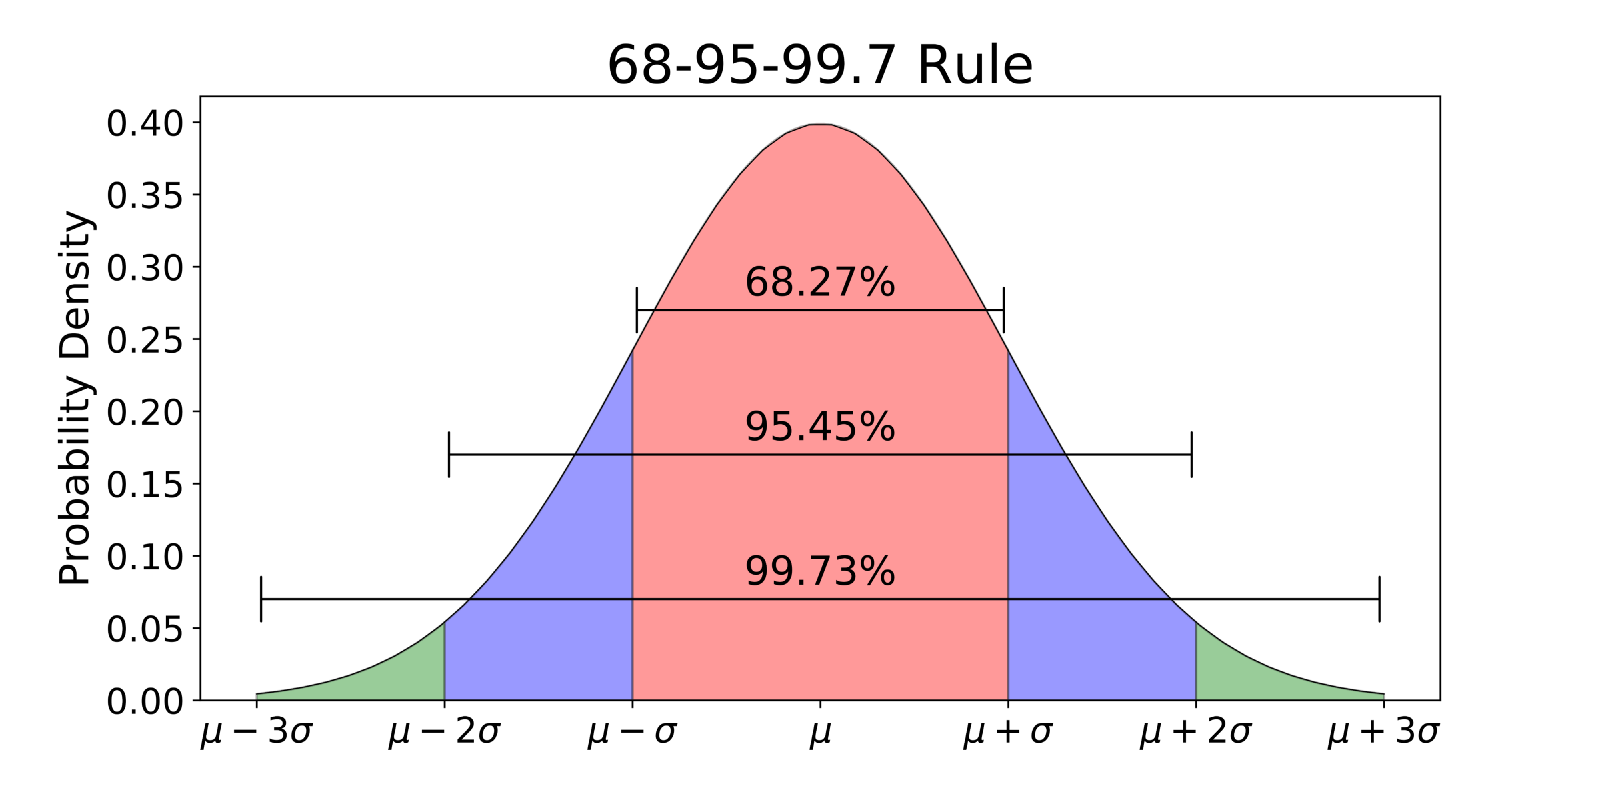

In [67]:
from IPython.core.display import Image 
Image(filename='/Users/kevin/Dropbox/Github/Classes/IS_485_685/Normal_dist.png')

In [64]:
from scipy.stats import norm

# This calculates the cdf of a Standard Normal distribution for the number zero and lower
print(norm(0, 1).cdf(0))

# This calculates the probability of a Normal Dist from the number 0 and lower.
print(norm(1, 3).cdf(0))

0.5
0.36944134018176367
